# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

According to the Great Learning online prompt:
 
#### Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.

#### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [411]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [412]:
# read the data
df = pd.read_csv('abtest.csv')
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [13]:
#show a couple of ways to determine the number of rows and columns in the data
df.info()
print (df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
(100, 6)


In [14]:
# determine the total number of duplicates in the dataframe
df.duplicated().sum()

0

In [16]:
# determine if there any any missing values in each series in the dataframe
df.isna().any()

user_id                   False
group                     False
landing_page              False
time_spent_on_the_page    False
converted                 False
language_preferred        False
dtype: bool

### Univariate Analysis

### user_id

For the Univariate Analysis, user_id offers little to no meaningful analytical information because its sole purpose is identification and will have a unique value for each row of data.

 ### group

In [19]:
# determine the number of unique values in the Series
df['group'].nunique()

2

In [20]:
# determine the count of events within each group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

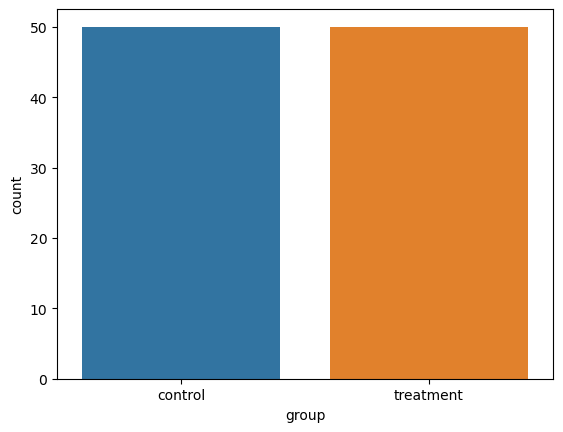

In [25]:
#create a countplot to represent the breakdown of control and treatment group numbers
sns.countplot(data = df, x = 'group');

#### Observations:

As was expected in this dataset, the control and treatment groups have a 50/50 split. The .nunique() function shows that there are only two values in the groups series and .value_counts() gives us the names of those values and the number of occurances within the series. The countplot also shows that there are even values for the control and treatment groups. Each groups appears in the series 50 times.

### landing_page

In [29]:
# determine the number of unique values
df['landing_page'].nunique()

2

In [30]:
# determine the count of events within each group
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

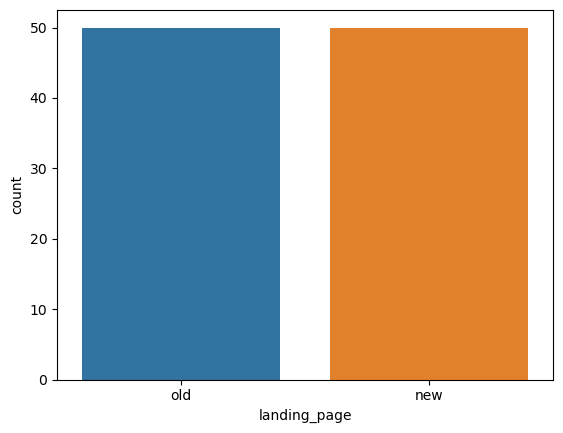

In [31]:
#create a countplot to represent the breakdown of old and new page users
sns.countplot(data = df, x = 'landing_page');

#### Observations:

landing_page is another variable with only two outcomes, old and new. .value_counts() shows that there is an even 50/50 breakdown between the two outcomes, meaning that half (50) of the users visited the old site and half (50) of the users visited the new site. 

### time_spent_on_the_page

In [41]:
# show the descriptive statistics for the Series
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

<AxesSubplot:xlabel='time_spent_on_the_page'>

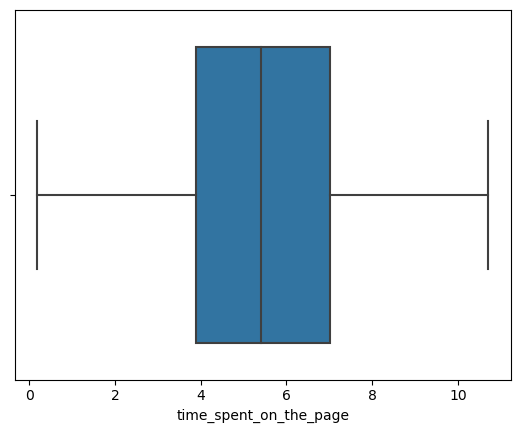

In [42]:
# create a boxplot to represent the descriptive statistics
sns.boxplot(data = df, x = 'time_spent_on_the_page');

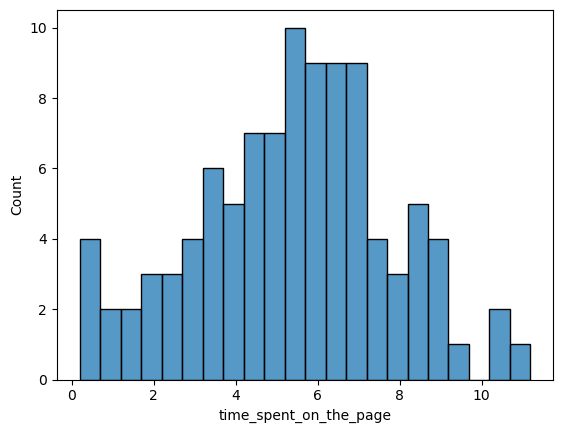

In [148]:
# create a histplot to represent the descriptive statistics
sns.histplot(data = df, x = 'time_spent_on_the_page', binwidth = 0.5);

In [409]:
# determine the median value of the Series
df['time_spent_on_the_page'].median()

5.415

#### Observations:

time_spent_on_the_page has a mean duration of 5.38 minutes with a min duration of 0.19 minutes and a max duration of 10.71 minutes. The boxplot shows the median to be right around 5 and a half minutes. This is confirmed by running .median(), which showed the actual value to be 5.42 minutes. Both the histplot and the boxplot show a pretty normal distribution. There did not seem to be any right or left skewdness to note. There were also no outliers shown by the boxplot. 

### converted

In [50]:
# determine the number of unique values in the Series
df['converted'].nunique()

2

In [51]:
# determine the count of events within each group
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

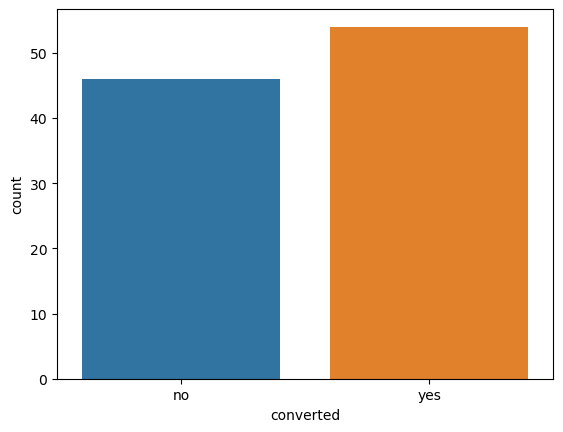

In [52]:
#create a countplot to represent the breakdown of user conversion
sns.countplot(data = df, x = 'converted');

#### Observations:

converted is another variable that has only two outcomes, yes or no. The data shows that there was a similar distribution between yes and no, with a slight lean towards yes. .value_counts() shows that 54 users were converted (yes) while 46 users were not converted (no).

### langauge_preferred

In [53]:
# determine the number of unique values in the Series
df['language_preferred'].nunique()

3

In [54]:
# determine the count of events within each group
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

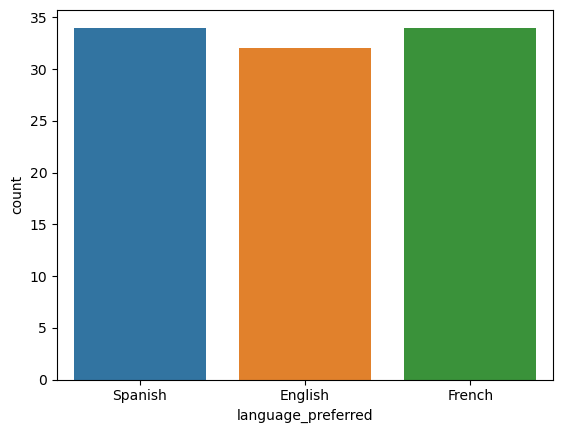

In [56]:
#create a countplot to represent the breakdown of users language preference
sns.countplot(data = df, x = 'language_preferred');

#### Observations:

language_preferred contains three unique values, Spanish, French, and English. The data shows that there is a pretty even breakdown of users' language preferences within this DataFrame. 34 users prefer Spanish, 34 users prefer French, and 32 users prefer English.

### Bivariate Analysis

### group and landing_page

In [413]:
# group together the landing_page and group Series
df['landing_page(group)'] = df['landing_page'] + '(' + df['group'] + ')'
# present the outcomes of the grouping
df['landing_page(group)'].head()

0      old(control)
1    new(treatment)
2    new(treatment)
3      old(control)
4    new(treatment)
Name: landing_page(group), dtype: object

In [414]:
# drop the landing_page and group Series now that landing_page(group) has been created
df.drop(['group', 'landing_page'], axis = 1, inplace = True)

In [415]:
# determine the number of unique values in the new Series
df['landing_page(group)'].nunique()

2

In [83]:
# determine the count of events within each of the new groups
df['landing_page(group)'].value_counts()

old(control)      50
new(treatment)    50
Name: landing_page(group), dtype: int64

<AxesSubplot:xlabel='landing_page(group)', ylabel='count'>

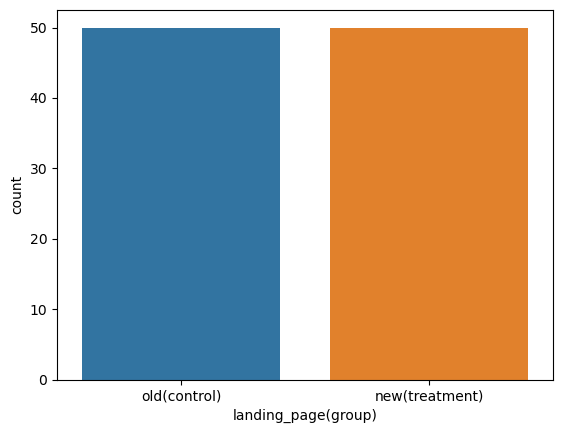

In [84]:
# create a countplot to represent the breakdown of users in each group
sns.countplot(data = df, x = 'landing_page(group)')

#### Observations:
The group and landing_page represent the same data with different terms. The group series contains the values "control" and "treatment" and the landing_page contains the values "old" and "new", but "old" is essentially the landing_page equivalent to "control" and the same is true of "new" and "treatment". They will always be found in the same row. The univariate analysis is the same between the two series. Therefore, I have combined them into a single series named 'landing_page(group)' that will represent both series for the analysis.

### vs time_spent_on_the_page

In [98]:
# show the mean, median, and total values for the landing_page(group) series
time_stats = df.groupby('landing_page(group)')['time_spent_on_the_page'].agg(['mean', 'median', 'sum'])
# print the results
print(time_stats)

                       mean  median     sum
landing_page(group)                        
new(treatment)       6.2232   6.105  311.16
old(control)         4.5324   4.380  226.62


<AxesSubplot:xlabel='landing_page(group)', ylabel='time_spent_on_the_page'>

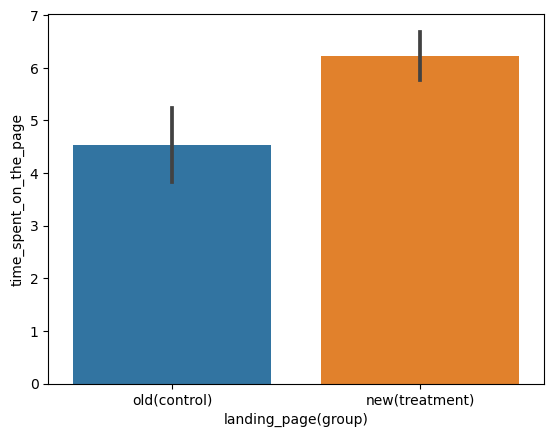

In [92]:
# create a barplot to represent the relationship between the two Series
sns.barplot(data = df, x = 'landing_page(group)', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='landing_page(group)', ylabel='time_spent_on_the_page'>

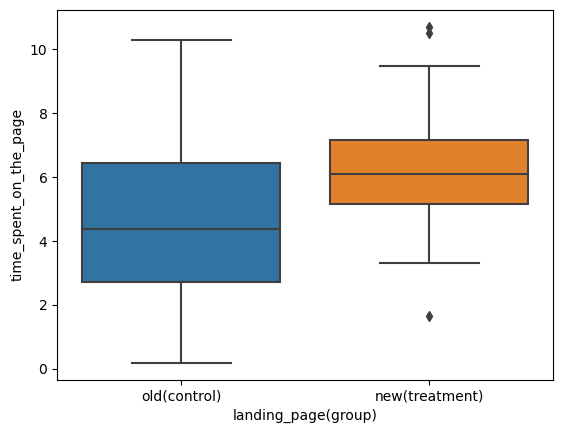

In [93]:
# create a boxplot to represent the relationship between the two Series
sns.boxplot(data = df, x = 'landing_page(group)', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='landing_page(group)', ylabel='time_spent_on_the_page'>

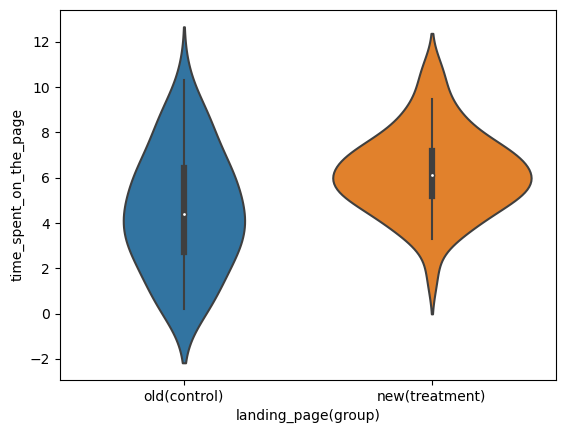

In [94]:
# create a violinplot to represent the relationship between the two Series
sns.violinplot(data = df, x = 'landing_page(group)', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='landing_page(group)', ylabel='time_spent_on_the_page'>

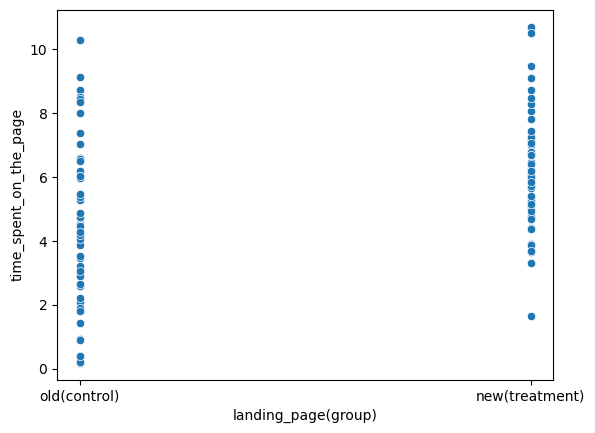

In [95]:
# create a scatterplot to represent the relationship between the two Series
sns.scatterplot(data = df, x = 'landing_page(group)', y = 'time_spent_on_the_page')

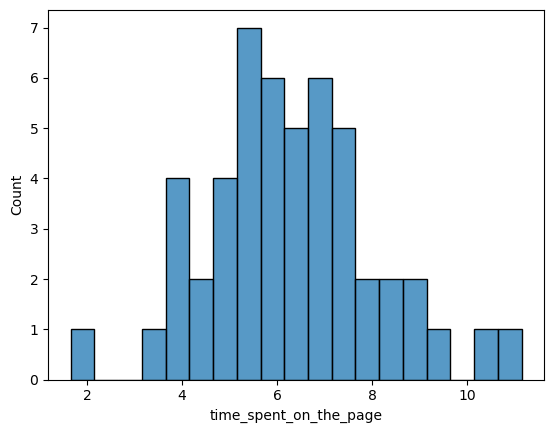

In [158]:
# create a histplot to represent the distribution of the new(treatment) values based on time spent on the page
sns.histplot(data = df[df['landing_page(group)']=='new(treatment)'], x = 'time_spent_on_the_page', binwidth = 0.5);

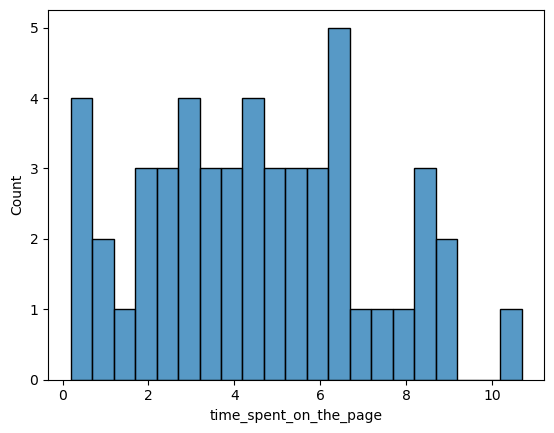

In [160]:
# create a histplot to represent the distribution of the old(control) values based on time spent on the page
sns.histplot(data = df[df['landing_page(group)']=='old(control)'], x = 'time_spent_on_the_page', binwidth = 0.5);

#### Observations:

A new DataFrame called time_stats was created by grouping landing_page(group) and time_spent_on_the_page. This new Dataframe showed that the new(treatment) group had a mean duration of 6.22 minutes, a median duration of 6.11 minutes, and a total duration of 311.16 minutes spent on the page. The old(control) group had a mean duration of 4.53 minutes, a median duration of 4.38 minutes, and a total duration of 226.62 minutes spent on the page. This data is supported by the countplot, boxplot, violin plot, and scatterplot shown above. Also, while there is a normal distribution in time_spent_on_the_page for the new(treatment) group, the old(control) group shows a slightly more uniform distribution. 

### vs converted

In [109]:
# group the Series and determine the breakdown of value counts
land_and_convert = df.groupby('landing_page(group)')['converted']
land_and_convert.value_counts()

landing_page(group)  converted
new(treatment)       yes          33
                     no           17
old(control)         no           29
                     yes          21
Name: converted, dtype: int64

<AxesSubplot:xlabel='landing_page(group)', ylabel='count'>

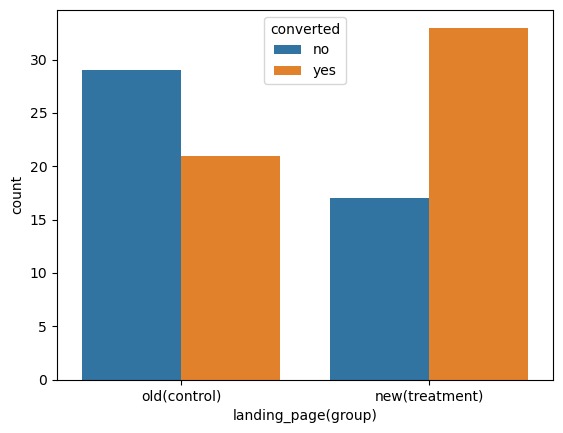

In [103]:
# create a countplot to represent the number of conversions by group
sns.countplot(data = df, x = 'landing_page(group)', hue = 'converted')

#### Observations:

Of those who were in the new(treatment) group, 33 (66%) converted and 17 (34%) did not convert. Of those who were in the old(control) group, 21 (42%) converted and 29 (58%) did not convert. 

### vs language_preferred

In [138]:
# group the Series and determine the breakdown of value counts
language_by_group = df.groupby('landing_page(group)')['language_preferred']
language_by_group.value_counts()

landing_page(group)  language_preferred
new(treatment)       French                17
                     Spanish               17
                     English               16
old(control)         French                17
                     Spanish               17
                     English               16
Name: language_preferred, dtype: int64

<AxesSubplot:xlabel='landing_page(group)', ylabel='count'>

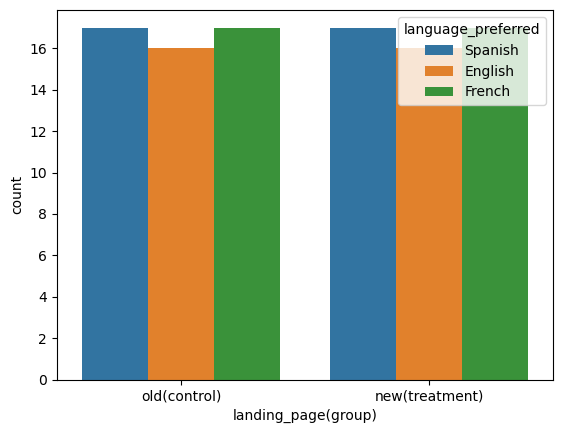

In [130]:
# create a countplot to represent the number of users per language preference that used each page
sns.countplot(data = df, x = 'landing_page(group)', hue = 'language_preferred')

#### Observations:

This analysis shows the breakdown of users chosen for the control vs treatment groups based on language_preferred. The coordinators for this A/B test chose an even distribution between languages for each group. 17 users for each group preferred French, 17 users for each group preferred Spanish, and 16 users for each group preferred English. A visual representation of this breakdown is shown by the countplot above. 

### time_spent_on_the_page

### vs converted

In [100]:
# show the mean, median, and total values of time spent on the page for the converted series
time_stats = df.groupby('converted')['time_spent_on_the_page'].agg(['mean', 'median', 'sum'])
# print the results
print(time_stats)

               mean  median     sum
converted                          
no         3.915870   3.980  180.13
yes        6.623148   6.495  357.65


<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

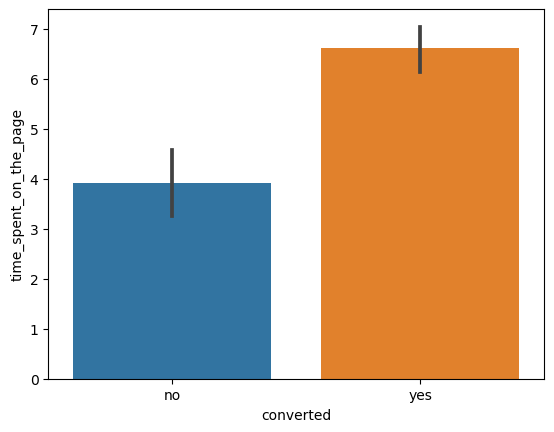

In [111]:
# create a barplot to represent the relationship between the two Series
sns.barplot(data = df, x = 'converted', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

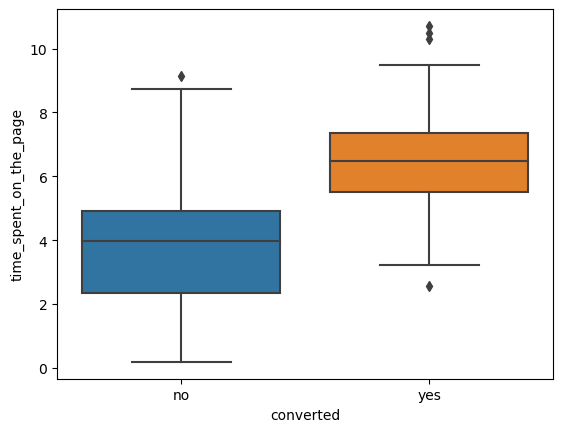

In [112]:
# create a boxplot to represent the relationship between the two Series
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

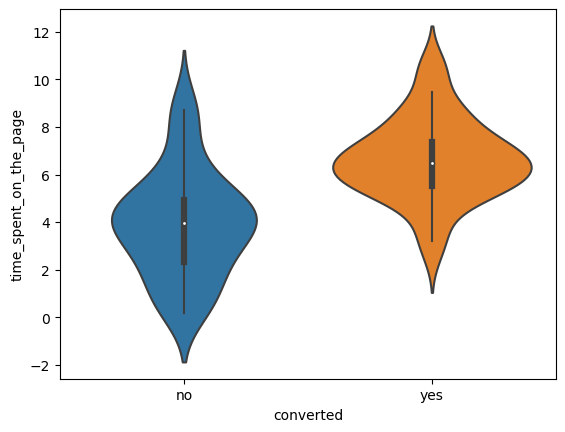

In [113]:
# create a violinplot to represent the relationship between the two Series
sns.violinplot(data = df, x = 'converted', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

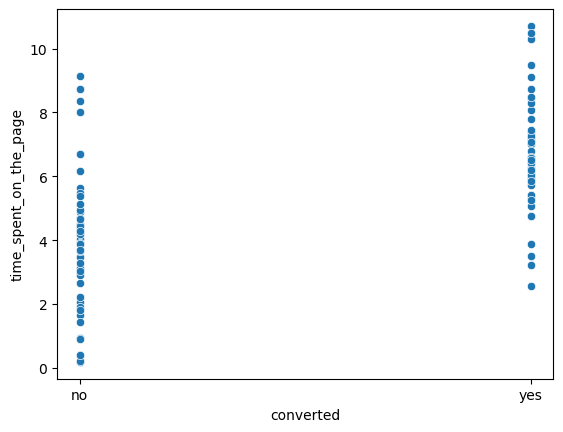

In [114]:
# create a scatterplot to represent the relationship between the two Series
sns.scatterplot(data = df, x = 'converted', y = 'time_spent_on_the_page')

#### Observations:

This data supports the hypothesis made in the problem statement that the time spent on a page is positively correlated with conversion rate. This data shows that those who were not converted spent a mean duration of 3.19 minutes, a median duration of 3.98 minutes, and a total of 180.13 minutes on the page. The data also shows that those who were converted spent a mean duration of 6.62 minutes, a median duration of 6.50 minutes, and a total of 357.65 minutes on the page.This data is supported by the countplot, boxplot, violin plot, and scatterplot shown above.

### vs language_preferred

In [118]:
# show the mean, median, and total values of time spent on the page for the language_preferred series
time_stats = df.groupby('language_preferred')['time_spent_on_the_page'].agg(['mean', 'median', 'sum'])
print(time_stats)

                        mean  median     sum
language_preferred                          
English             5.559062   5.755  177.89
French              5.253235   5.315  178.61
Spanish             5.331765   5.605  181.28


<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

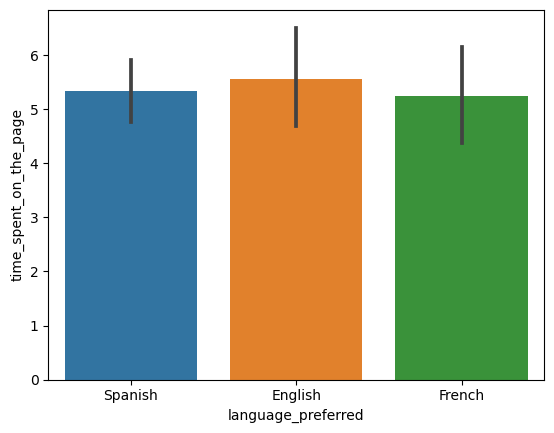

In [127]:
# create a barplot to represent the relationship between the two Series
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

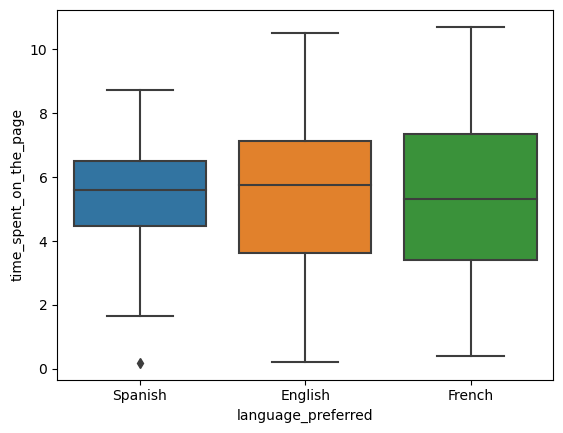

In [123]:
# create a boxplot to represent the relationship between the two Series
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

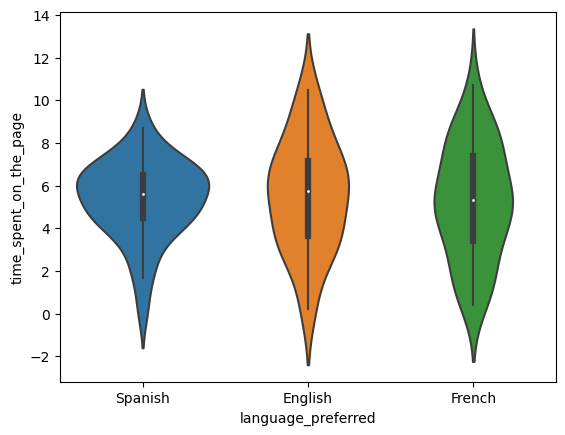

In [124]:
# create a violinplot to represent the relationship between the two Series
sns.violinplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

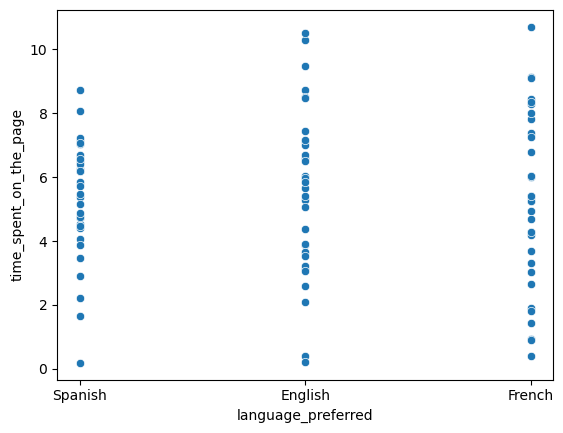

In [125]:
# create a scatterplot to represent the relationship between the two Series
sns.scatterplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')

#### Observations:

language_preferred did not seem to have much affect on time_spent_on_the_page. The mean, median, and total time spent on each page had negligible variance between languages. The violin plot and box plot show that there is a tighter grouping of data points around 5.5-6 minutes while French and English have a wider spread of data points, but this did not seem to effect the mean, median, or total time spent on the page.  

### converted

### vs language_preferred

In [139]:
# group the Series and determine the breakdown of value counts
languagepref_converted = df.groupby('language_preferred')['converted']
languagepref_converted.value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

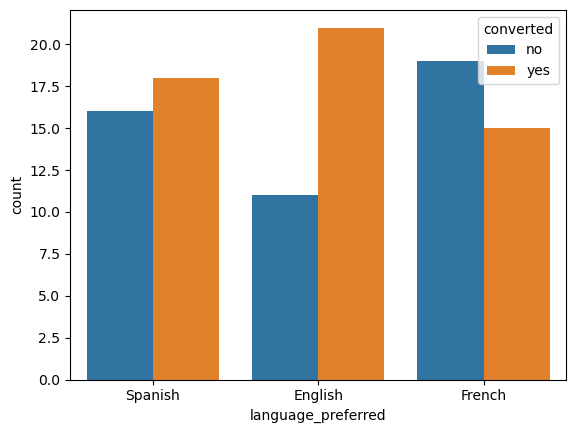

In [129]:
# create a countplot to represent the relationship between the two Series
sns.countplot(data = df, x = 'language_preferred', hue = 'converted')

#### Observations:

We know from the landing_page(group) vs language_preferred bivariate analysis above that there is an even distribution of language preference between the control and the treatment groups. Of the users who prefer Spanish, 18 (52.94%) were converted and 16 (47.06%) were not. Of the users who prefer English, 21 (65.62%) were converted and 11 (34.38%) were not. Of the users who prefer French, 15 (44.12%) were converted and 19 (55.88%) were not. This shows that those who prefer english may have been more likely to convert than French and Spanish users, and of the three language preferences, French users were the only users that may have been less likely to be converted. 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [372]:
# show the mean, median, and total values of time spent on the page for the landing_page(group) series
time_stats = df.groupby('landing_page(group)')['time_spent_on_the_page'].agg(['mean', 'median', 'std'])
# print the results
print(time_stats)

                       mean  median       std
landing_page(group)                          
new(treatment)       6.2232   6.105  1.817031
old(control)         4.5324   4.380  2.581975


<AxesSubplot:xlabel='landing_page(group)', ylabel='time_spent_on_the_page'>

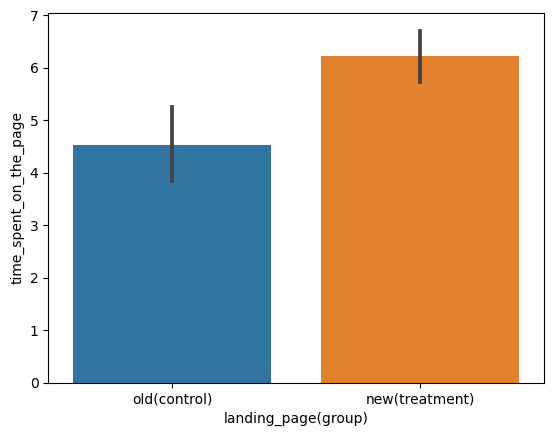

In [141]:
# create a barplot to represent the relationship between the two Series
sns.barplot(data = df, x = 'landing_page(group)', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='landing_page(group)', ylabel='time_spent_on_the_page'>

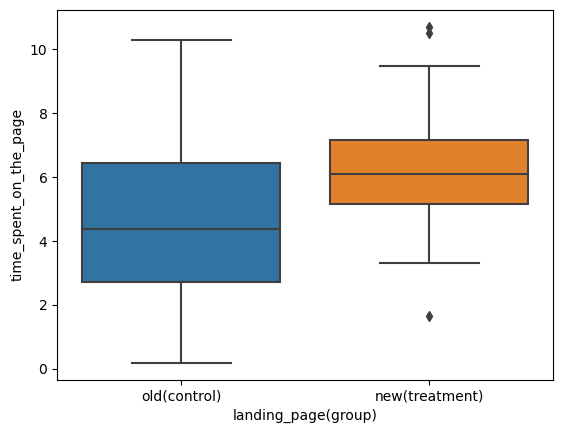

In [142]:
# create a boxplot to represent the relationship between the two Series
sns.boxplot(data = df, x = 'landing_page(group)', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='landing_page(group)', ylabel='time_spent_on_the_page'>

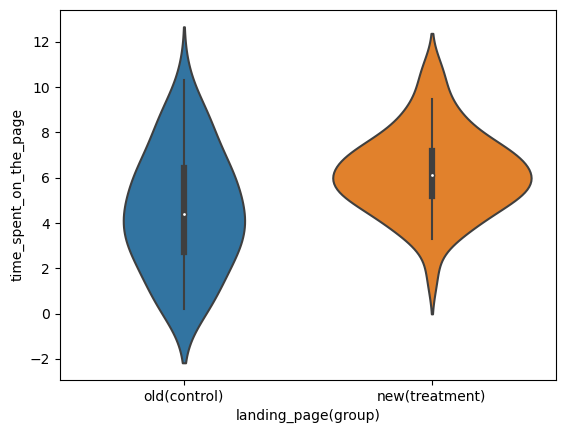

In [143]:
# create a violinplot to represent the relationship between the two Series
sns.violinplot(data = df, x = 'landing_page(group)', y = 'time_spent_on_the_page')

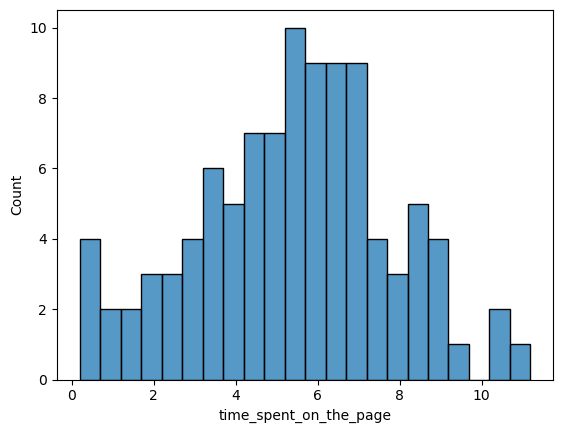

In [162]:
# create a histplot to represent the distribution of the time_spent_on_the_page
sns.histplot(data = df, x = 'time_spent_on_the_page', binwidth = 0.5);

### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): The average time spent on the new(treatment) page is equal to or less than the average time spent on the old(control) page.

Alternate Hypothesis (H1): The average time spent on the new(treatment) page is greater than the average time spent on the old(control) page. 

### Step 2: Select Appropriate test

In [371]:
# group the landing_page(group) and time_spent_on_the_page Series
time_by_group = df.groupby('landing_page(group)')['time_spent_on_the_page']
# print the Mean and Standard Deviation
print('Mean time spent on each page by', time_by_group.mean())
print()
print('Standard Deviation of time spent on each page by', time_by_group.std())

Mean time spent on each page by landing_page(group)
new(treatment)    6.2232
old(control)      4.5324
Name: time_spent_on_the_page, dtype: float64

Standard Deviation of time spent on each page by landing_page(group)
new(treatment)    1.817031
old(control)      2.581975
Name: time_spent_on_the_page, dtype: float64


#### Criteria:

* There are two independent samples, the control and the treatment samples
* Sample statistics are known but population statistiscs are not known
* Continuous Data - Yes, time_spent_on_the_page is a measurement of time, and therefore a continuous variable
* Normally Distributed Populations - The entire sample population is normally distributed and the treatment sample population is normally distributed. The control sample population is a normal to uniform distribution. However, the Central Limit Theorem suggests that the distribution of the means within the control sample should be a normal distribution as it has a sample size of 50.
* Independent Populations - Yes, with the A/B testing, there are two independent populations, a control group population and a treatment group population. 
* Equal Population Standard Deviations - The control and treatment sample standard deviations not equal
* Random sampling from the population - Yes, the problem statment states that the collected sample is a random sample.

#### 2 Sample Independent T-Test for Equality of Means - Unequal Standard Deviation

The 2 Sample T-Test would be the most appropriate test for this A/B Test because it compares the means of two independent samples (A trial and B trial) and meets the criteria presented above.

### Step 3: Decide the significance level

Significance level ($\alpha$) = 0.05 or 5%

### Step 4: Collect and prepare data

In [417]:
# Create new DataFrames for Control and Treatment
control_df = df[df['landing_page(group)'] == 'old(control)']
treatment_df = df[df['landing_page(group)'] == 'new(treatment)']

# Create a new DataFrame with Control and Treatment time values
Q1_df = pd.DataFrame({'Control': control_df['time_spent_on_the_page'].reset_index(drop = True), 'Treatment': treatment_df['time_spent_on_the_page'].reset_index(drop = True)})

# Print the new DataFrame
Q1_df.head()

,Control,Treatment
0,3.48,7.13
1,3.02,4.40
2,5.28,4.75
3,6.53,5.25
4,2.08,10.71


In [418]:
# print the Mean and Standard Deviation values for each group
print(f'The Mean time spent on the old page is ', str(round(Q1_df['Control'].mean(), 2)))
print(f'The Mean time spent on the new page is ', str(round(Q1_df['Treatment'].mean(), 2)))
print(f'The Standard Deviation of time spent on the old page is ', str(round(Q1_df['Control'].std(), 2)))
print(f'The Standard Deviation of time spent on the new page is ', str(round(Q1_df['Treatment'].std(), 2)))

The Mean time spent on the old page is  4.53
The Mean time spent on the new page is  6.22
The Standard Deviation of time spent on the old page is  2.58
The Standard Deviation of time spent on the new page is  1.82


### Step 5: Calculate the p-value

In [251]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(Q1_df['Treatment'], Q1_df['Control'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [252]:
# define the values
a = 0.05
p = p_value

# create an if else statement to output the correct conclusion
if a > p_value:
    print (a, '>', round(p,5))
    print('As the p-value (',round(p,5),') is less than the level of significance (',a,'), we can reject the null hypothesis.')
else:
    print (a, '<', round(p,5))
    print('As the p-value (',round(p,5),') is greater than the level of significance (',a,'), we fail to reject the null hypothesis.')

0.05 > 0.00014
As the p-value ( 0.00014 ) is less than the level of significance ( 0.05 ), we can reject the null hypothesis.


### Step 7:  Draw inference

The p-value (~0.00014) is less than the level of significance, which means that we can reject the null hypothesis. There is enough evidence to support the claim that users are spending more time on the new page than the existing page.  

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [244]:
# group landing_page(group) and converted Series and determine value counts
land_and_convert = df.groupby('landing_page(group)')['converted']
print('Total number of users converted:')
land_and_convert.value_counts()

Total number of users converted:


landing_page(group)  converted
new(treatment)       yes          33
                     no           17
old(control)         no           29
                     yes          21
Name: converted, dtype: int64

<AxesSubplot:xlabel='landing_page(group)', ylabel='count'>

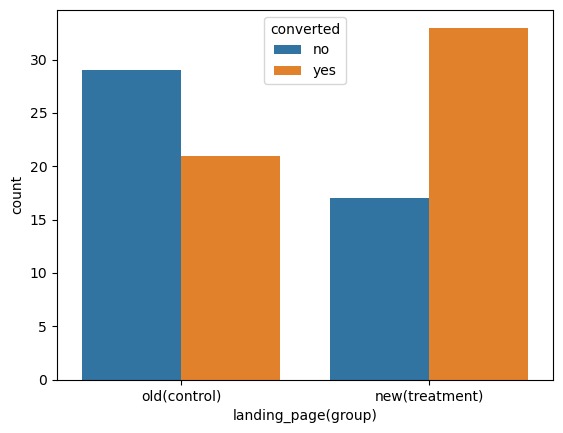

In [240]:
# create a countplot to represent the relationship between the two Series
sns.countplot(data = df, x = 'landing_page(group)', hue = 'converted')

### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): The conversion rate of the new(treatment) page is equal to or less than the conversion rate of the old(control) page.

Alternate Hypothesis (H1): The conversion rate of the new(treatment) page is greater than the conversion rate of the old(control) page. 

### Step 2: Select Appropriate test

#### Criteria:

* There are two independent samples, the control and the treatment samples
* Sample statistics are known but population statistiscs are not known
* Continuous Data - No, both variables are categorical
* Binomial Disribution - Yes, there are two outcomes: converted or not converted.
* Random sampling from the population - Yes, the problem statment states that the collected sample is a random sample.

#### 2 Sample Proportions Z-Test

The 2 Sample Proportions Z-test would be the most appropriate to test the proportions of users converted vs not converted because it compares proportions from 2 samples and meets the criteria presented above. 

### Step 3: Decide the significance level

Significance level ($\alpha$) = 0.05 or 5%

### Step 4: Collect and prepare data

The data is appropriately collected and prepared to run a 2 Sample Proportion Z-Test

### Step 5: Calculate the p-value

In [428]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
users_converted = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(users_converted, nobs, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [429]:
# define the values
a = 0.05
p = p_value

# create an if else statement to output the correct conclusion
if a > p_value:
    print (a, '>', round(p,2))
    print('As the p-value (',round(p,2),') is less than the level of significance (',a,'), we can reject the null hypothesis.')
else:
    print (a, '<', round(p,2))
    print('As the p-value (',round(p,2),') is greater than the level of significance (',a,'), we fail to reject the null hypothesis.')

0.05 > 0.01
As the p-value ( 0.01 ) is less than the level of significance ( 0.05 ), we can reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.02) is less than the level of significance (0.05), we can reject the null hypothesis. There is enough evidence to support the claim that users are more likely to be converted on the new page compared to the old page.  

## 3. Are the conversion and preferred language independent or related?

### Perform Visual Analysis

In [139]:
# group language_preferred and converted Series and determine value counts
languagepref_converted = df.groupby('language_preferred')['converted']
languagepref_converted.value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

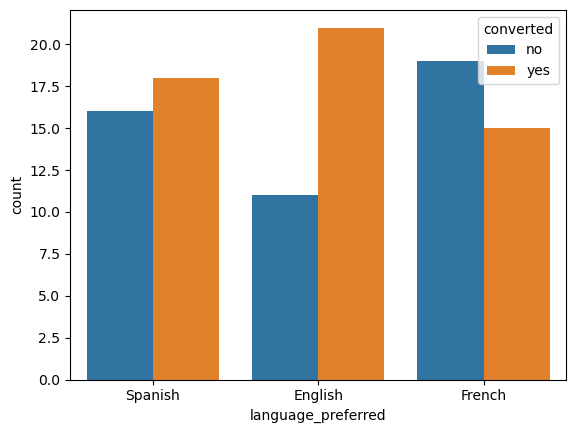

In [129]:
# create a countplot to represent the relationship between the two Series
sns.countplot(data = df, x = 'language_preferred', hue = 'converted')

### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): The conversion rate is independent of preferred language.

Alternate Hypothesis (H1): The conversion rate is dependent on preferred language.

### Step 2: Select Appropriate test

* Categorical variables - Yes, both conversion rate and preferred language are categorical
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is at least 11.
* Random sampling from the population - Yes, the problem statment states that the collected sample is a random sample.

#### Chi Squared Test of Independence

The Chi Squared Test of Independence is the most appropriate to test these two variables because they are both categorical. 

### Step 3: Decide the significance level

Significance level ($\alpha$) = 0.05 or 5%

### Step 4: Collect and prepare data

In [343]:
# create a cross tabulation of the converted and lanuage preferred Series
Q3_df = pd.crosstab(df['converted'],df['language_preferred'])
# set the column headers for the new DataFrame
Q3_df.columns = ['Spanish', 'English', 'French']
# show the cross tabulation
Q3_df.head()

,Spanish,English,French
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [349]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(Q3_df)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [351]:
# define the values
a = 0.05
p = p_value

# create an if else statement to output the correct conclusion
if a > p_value:
    print (a, '>', round(p,2))
    print('As the p-value (',round(p,2),') is less than the level of significance (',a,'), we can reject the null hypothesis.')
else:
    print (a, '<', round(p,2))
    print('As the p-value (',round(p,2),') is greater than the level of significance (',a,'), we fail to reject the null hypothesis.')

0.05 < 0.21
As the p-value ( 0.21 ) is greater than the level of significance ( 0.05 ), we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.21) is greater than the level of significance (0.05), we fail to reject the null hypothesis. There is not enough evidence to support the claim that conversion rate is dependent on preferred language. 

## 4. Is the time spent on the new page the same for the different language users?

### Step 1: Collect and prepare data

In [400]:
# create a new DataFrame for language_preferred, time_spent_on_the_page, and landing_page(group)
Q4_df = pd.DataFrame({'language_preferred': ['language_preferred'],
                      'time_spent_on_the_page': ['time_spent_on_the_page'],
                      'landing_page(group)': ['landing_page(group)']})

# filter out the old(control) values
Q4_df = df[df['landing_page(group)']== 'new(treatment)']

# show the new DataFrame
Q4_df.head()

,user_id,time_spent_on_the_page,converted,language_preferred,landing_page(group)
1,546468,7.13,yes,English,new(treatment)
2,546462,4.40,no,Spanish,new(treatment)
4,546459,4.75,yes,Spanish,new(treatment)
6,546448,5.25,yes,French,new(treatment)
8,546461,10.71,yes,French,new(treatment)


### Perform Visual Analysis

In [398]:
# show the mean, median, and total values of time spent on the page for the language_preferred series
time_stats = Q4_df.groupby('language_preferred')['time_spent_on_the_page'].agg(['mean', 'median', 'sum', 'std', 'count'])
print(time_stats)

                        mean  median     sum       std  count
language_preferred                                           
English             6.663750   6.865  106.62  1.984150     16
French              6.196471   5.420  105.34  1.933394     17
Spanish             5.835294   6.200   99.20  1.525656     17


<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

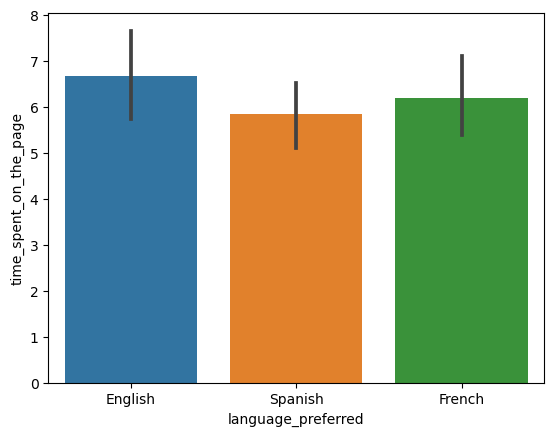

In [376]:
# create a barplot to represent the relationship between the two Series
sns.barplot(data = Q4_df, x = 'language_preferred', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

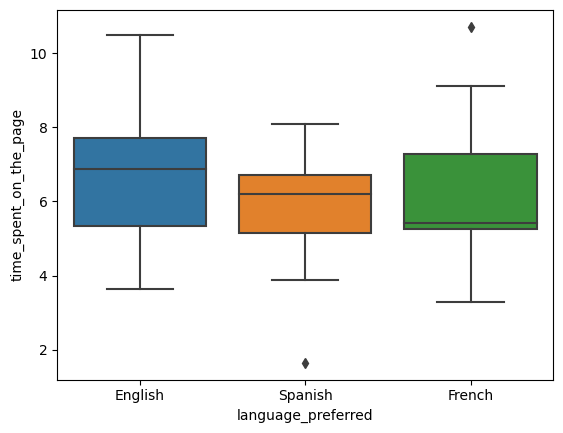

In [377]:
# create a boxplot to represent the relationship between the two Series
sns.boxplot(data = Q4_df, x = 'language_preferred', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

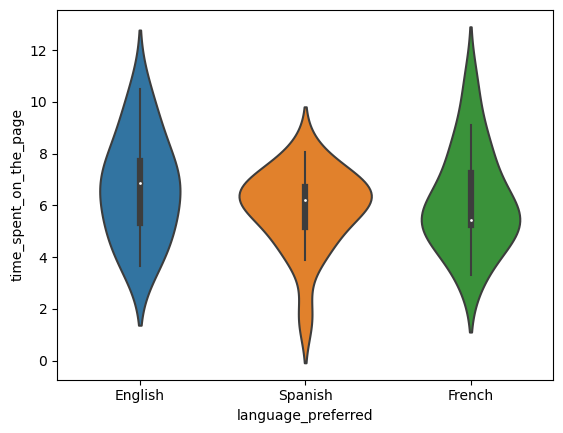

In [378]:
# create a violinplot to represent the relationship between the two Series
sns.violinplot(data = Q4_df, x = 'language_preferred', y = 'time_spent_on_the_page')

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

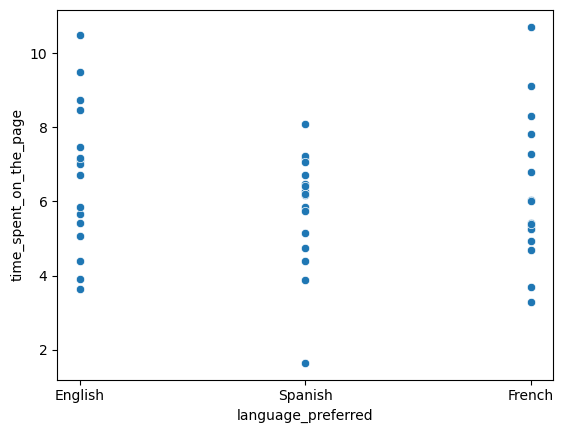

In [379]:
# create a scatterplot to represent the relationship between the two Series
sns.scatterplot(data = Q4_df, x = 'language_preferred', y = 'time_spent_on_the_page')

### Step 2: Define the null and alternate hypotheses

Null Hypothesis (H0): The mean time spent on the new page is equal for all different language preferences among users.

Alternate Hypothesis (H1): The mean time spent on the new page is different between at least one pair of different language preferences among users.

### Step 3: Select Appropriate test

#### Shapiro-Wilk's Test - Test for Normality

#### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): The time spent on the new page follows a normal distribution

Alternate Hypothesis (H1): The time spent on the new page does not follow a normal distribution

#### Step 2: Decide the significance level

Significance level ($\alpha$) = 0.05 or 5%

#### Step 3: Calculate the p-value

In [408]:
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(Q4_df['time_spent_on_the_page'])

# define the values
a = 0.05
p = p_value

# create an if else statement to output the correct conclusion
if a > p_value:
    print (a, '>', round(p,2))
    print('As the p-value (',round(p,2),') is less than the level of significance (',a,'), we can reject the null hypothesis.')
else:
    print (a, '<', round(p,2))
    print('As the p-value (',round(p,2),') is greater than the level of significance (',a,'), we fail to reject the null hypothesis.')

0.05 < 0.8
As the p-value ( 0.8 ) is greater than the level of significance ( 0.05 ), we fail to reject the null hypothesis.


#### Insight

As the p-value (~0.8) is greater than the level of significance (0.05), we fail to reject the null hypothesis. There is not enough evidence to support the claim that the time spent on the page does not follow a normal distribution.

#### Levene's Test- Test for Equality of Variance

#### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): The variances of time spent on the new page are equal across all preferred languages

Alternate Hypothesis (H1): The variances of time spent on the new page are not equal across all preferred languages

#### Step 2: Decide the significance level

Significance level ($\alpha$) = 0.05 or 5%

#### Step 3: Calculate the p-value

In [425]:
#import the required function
from scipy.stats import levene
statistic, p_value = levene(Q4_df['time_spent_on_the_page'][Q4_df['language_preferred']=="Spanish"], 
                            Q4_df['time_spent_on_the_page'][Q4_df['language_preferred']=="English"], 
                            Q4_df['time_spent_on_the_page'][Q4_df['language_preferred']=="French"])

# define the values
a = 0.05
p = p_value

# create an if else statement to output the correct conclusion
if a > p_value:
    print (a, '>', round(p,2))
    print('As the p-value (',round(p,2),') is less than the level of significance (',a,'), we can reject the null hypothesis.')
else:
    print (a, '<', round(p,2))
    print('As the p-value (',round(p,2),') is greater than the level of significance (',a,'), we fail to reject the null hypothesis.')

0.05 < 0.47
As the p-value ( 0.47 ) is greater than the level of significance ( 0.05 ), we fail to reject the null hypothesis.


#### Insight

As the p-value (~0.47) is greater than the level of significance (0.05), we fail to reject the null hypothesis. There is not enough evidence to support the claim that the variances of time spent on the new page are not equal across all preferred languages.

#### Criteria:

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.
* Independent Populations - Yes, there are three independent sample populations - those who prefer Spanish, those who prefer English, and those who prefer French. 
* Random sampling from the population - Yes, the problem statment states that the collected sample is a random sample.

#### ANOVA Test

The ANOVA Test is the most appropriate because there are 3 are three independent sample populations who's means are being compared.

### Step 4: Decide the significance level

Significance level ($\alpha$) = 0.05 or 5%

### Step 5: Calculate the p-value

In [404]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(Q4_df.loc[Q4_df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              Q4_df.loc[Q4_df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              Q4_df.loc[Q4_df['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [406]:
# define the values
a = 0.05
p = p_value

# create an if else statement to output the correct conclusion
if a > p_value:
    print (a, '>', round(p,2))
    print('As the p-value (',round(p,2),') is less than the level of significance (',a,'), we can reject the null hypothesis.')
else:
    print (a, '<', round(p,2))
    print('As the p-value (',round(p,2),') is greater than the level of significance (',a,'), we fail to reject the null hypothesis.')

0.05 < 0.43
As the p-value ( 0.43 ) is greater than the level of significance ( 0.05 ), we fail to reject the null hypothesis.


### Step 7:  Draw inference

0.05 < 0.43
As the p-value (~0.43) is greater than the level of significance (0.05), we fail to reject the null hypothesis. There is not enough evidence to support the claim that the time spent on the new page is different between at least one pair of language preferences among users.

## Conclusion and Business Recommendations

#### Conclusion:

* Time spent on the page is positively correlated with conversion rate
* Users tended to spend more time on the new page than the old page
* The new page converted more users than the old page
* Preferred language did not significantly effect the time spent on the page
* Preferred language did not significantly effect the conversion rate


#### Business Recommendations:

* Go ahead and begin the transition from the old page to the new page
* Determine what variables were changed between the two pages and lean into those changes to continue to grow the subscriber count 
* Do not waste money or resources on trying to influence users based on the users' language preferences as there was no significant correlation between conversion and language preference


___